# Mini-Project 2
**Author**: Farkhad Kuanyshkereyev<br>
**Course**: Data Science<br>
**Professor**: Sepinoud Azimi Rashti

## **Step 1 - Data Processing**

In [1]:
# Importing necessary libraries

from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

seed = 777

In [2]:
# Uploading the data file

# NOTE: The name of the data file is written into the following variable

file_name = 'MP2_Data.csv'
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving MP2_Data.csv to MP2_Data (2).csv


In [3]:
# Looking into the data

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [4]:
# Getting the list of columns

print("List of columns:\n")

for col in df.columns:
    print(col)

List of columns:

ID
Week2_Quiz1
Week3_MP1
Week3_PR1
Week5_MP2
Week5_PR2
Week7_MP3
Week7_PR3
Week4_Quiz2
Week6_Quiz3
Week8_Total
Week1_Stat0
Week1_Stat1
Week1_Stat2
Week1_Stat3
Week2_Stat0
Week2_Stat1
Week2_Stat2
Week2_Stat3
Week3_Stat0
Week3_Stat1
Week3_Stat2
Week3_Stat3
Week4_Stat0
Week4_Stat1
Week4_Stat2
Week4_Stat3
Week5_Stat0
Week5_Stat1
Week5_Stat2
Week5_Stat3
Week6_Stat0
Week6_Stat1
Week6_Stat2
Week6_Stat3
Week7_Stat0
Week7_Stat1
Week7_Stat2
Week7_Stat3
Week8_Stat0
Week8_Stat1
Week8_Stat2
Week8_Stat3
Week9_Stat0
Week9_Stat1
Week9_Stat2
Week9_Stat3
Grade


In [5]:
# Getting statistical information from numerical data columns

df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,6.785047,0.0,0.598131,0.224299,16.88785,13.299065,1.252336,1.841121,31.728972,2.822430,0.953271,1.130841,41.915888,16.046729,1.943925,1.009346,26.074766,5.009346,1.588785,0.663551,37.607477,14.271028,2.775701,0.411215,16.355140,3.242991,1.813084,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,7.157300,0.0,1.966031,0.730836,16.30796,11.308049,1.505295,4.202761,28.686191,3.206165,2.689544,2.269919,47.164330,17.040675,2.790928,2.806648,31.159269,6.568213,3.954823,1.822003,47.851334,14.009815,7.206271,1.220526,22.242341,5.001587,4.895379,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,6.50000,10.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,4.000000,0.0,0.000000,0.000000,15.00000,11.000000,1.000000,0.000000,27.000000,4.000000,0.000000,0.000000,27.000000,15.000000,1.000000,0.000000,20.000000,4.000000,0.000000,0.000000,18.000000,15.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,12.000000,0.0,0.000000,0.000000,24.00000,19.000000,1.000000,2.000000,47.500000,4.000000,0.000000,1.000000,74.500000,27.500000,2.000000,1.000000,40.500000,6.500000,1.000000,0.000000,65.000000,25.000000,2.000000,0.000000,27.000000,5.000000,1.000000,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,27.000000,0.0,11.000000,6.000000,104.00000,57.000000,10.000000,25.000000,108.000000,15.000000,15.000000,14.000000,240.000000,87.000000,13.000000,24.000000,185.000000,39.000000,23.000000,11.000000,208.000000,51.000000,45.000000,7.000000,145.000000,24.000000,

In [6]:
# Dropping useless columns

df = df.drop(['Week1_Stat1', 'Week8_Total'], axis=1)

In [7]:
# Checking column data types and the number of missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week1_Stat0  107 non-null    int64  
 11  Week1_Stat2  107 non-null    int64  
 12  Week1_Stat3  107 non-null    int64  
 13  Week2_Stat0  107 non-null    int64  
 14  Week2_Stat1  107 non-null    int64  
 15  Week2_Stat2  107 non-null    int64  
 16  Week2_Stat3  107 non-null    int64  
 17  Week3_Stat0  107 non-null    int64  
 18  Week3_Stat1  107 non-null    int64  
 19  Week3_St

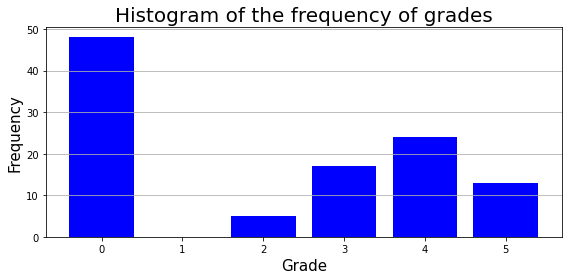

In [8]:
# Plotting the histogram of the frequency of grades

keys = df['Grade'].value_counts().keys()
values = df['Grade'].value_counts().values

plt.figure(figsize=(8, 4))
plt.title('Histogram of the frequency of grades', fontsize=20)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y')
plt.bar(keys, values, color='blue')
plt.tight_layout();

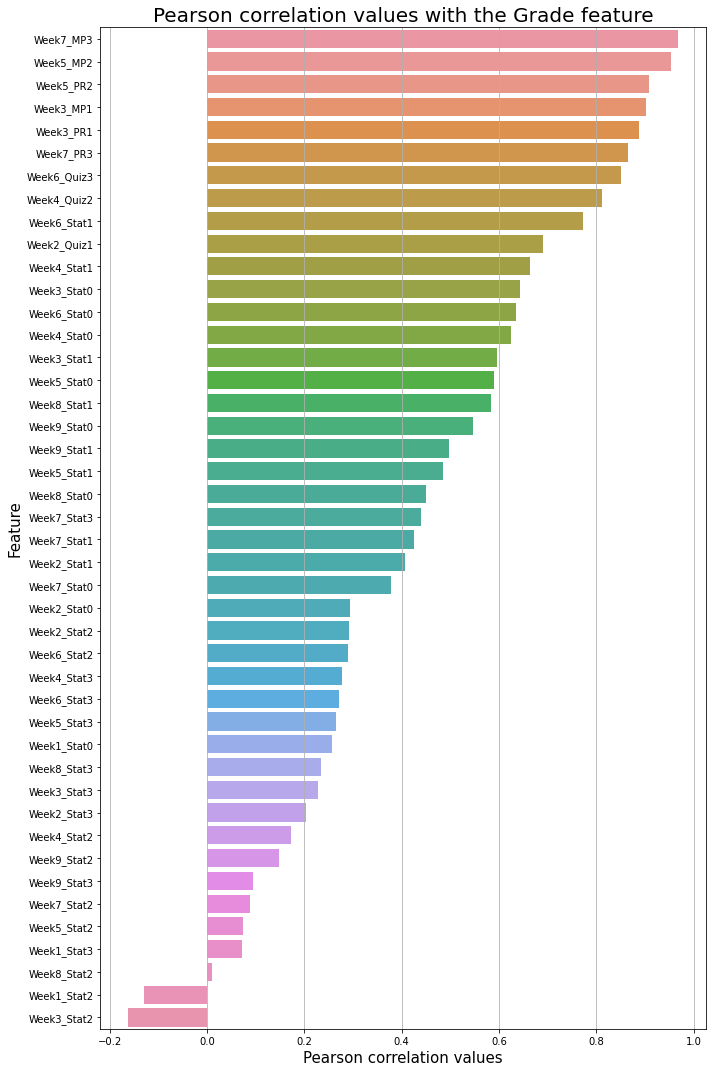

In [9]:
# Looking for the features with highest correlation with the Grades column

grade_corr_values = df.corr()['Grade'].sort_values(ascending=False)[1:]
keys = grade_corr_values.keys()
values = grade_corr_values.values
color = ['red'] * len(values[values < 0]) + ['green'] * len(values[values >= 0])

plt.figure(figsize=(10, 15))
plt.title('Pearson correlation values with the Grade feature', fontsize=20)
plt.xlabel('Pearson correlation values', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.grid(axis='x')
sns.barplot(x=values, y=keys)
plt.tight_layout();

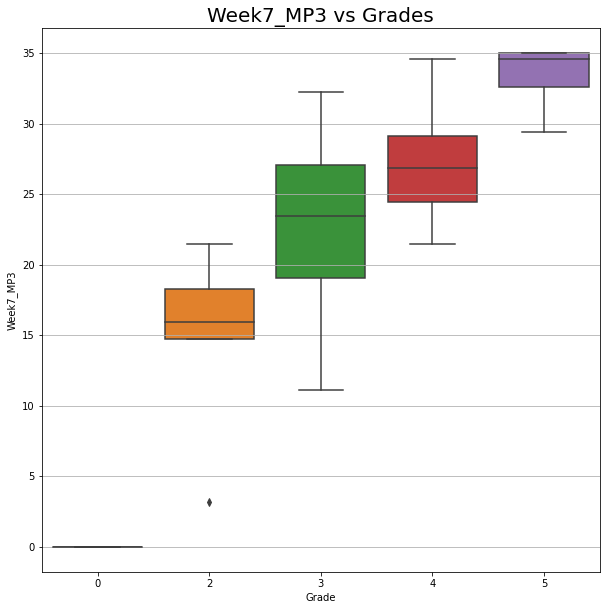

In [10]:
# Plotting box plots for Grades and Mini-Project 3 Scores

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Week7_MP3 vs Grades', fontsize=20)
plt.grid(axis='y')
sns.boxplot(x='Grade', y='Week7_MP3', data=df, ax=ax);

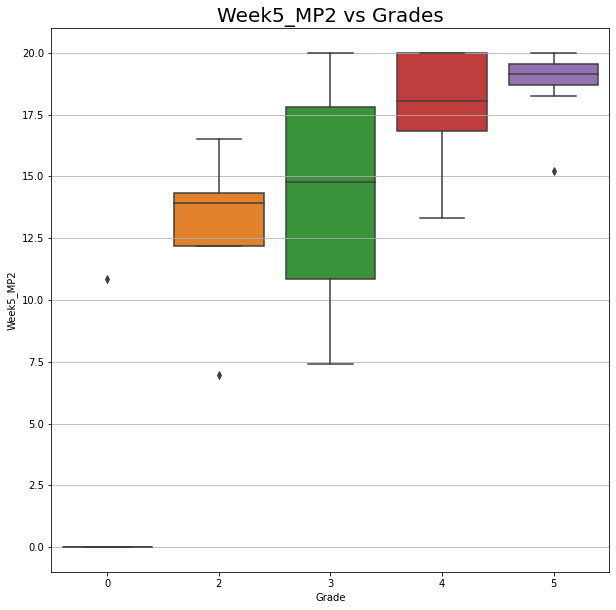

In [11]:
# Plotting box plots for Grades and Mini-Project 2 Scores

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Week5_MP2 vs Grades', fontsize=20)
plt.grid(axis='y')
sns.boxplot(x='Grade', y='Week5_MP2', data=df, ax=ax);

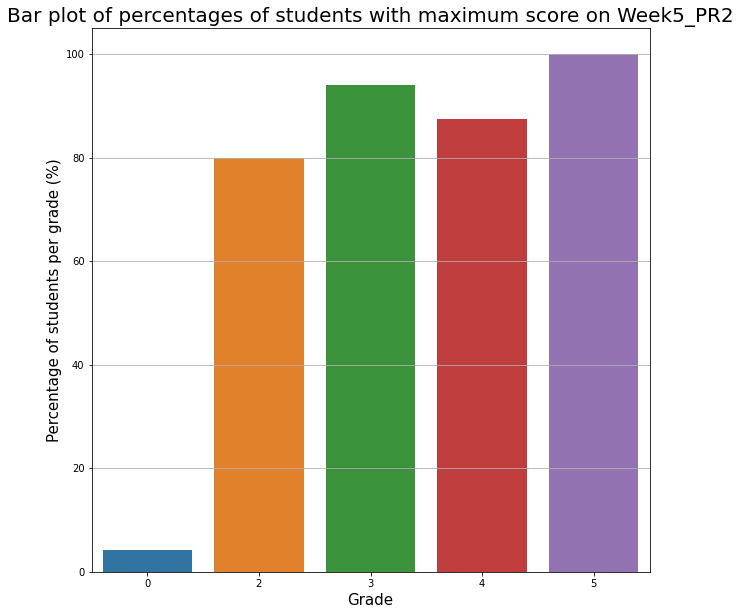

In [12]:
# Getting the percentage of students from each grade that have the highest score on Peer Review 2

percentages = df[df['Week5_PR2'] >= 5]['Grade'].value_counts() / df['Grade'].value_counts() * 100
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Bar plot of percentages of students with maximum score on Week5_PR2', fontsize=20)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Percentage of students per grade (%)', fontsize=15)
plt.grid(axis='y')
sns.barplot(x=percentages.index, y=percentages.values);

In [13]:
# 10 of the most correlated features are kept

features = keys[:10]
df = df[features.tolist() + ['Grade']]
df.head()

,Week7_MP3,Week5_MP2,Week5_PR2,Week3_MP1,Week3_PR1,Week7_PR3,Week6_Quiz3,Week4_Quiz2,Week6_Stat1,Week2_Quiz1,Grade
0,21.88,16.09,5.00,15.0,5.0,5.0,5.0,5.00,30,5.00,4
1,22.27,17.83,5.00,15.0,5.0,5.0,5.0,4.00,22,3.33,4
2,27.05,15.22,5.00,13.0,5.0,2.5,5.0,5.00,20,1.67,3
3,31.02,10.00,5.00,14.0,5.0,5.0,5.0,3.13,19,2.50,3
4,15.91,12.17,4.93,15.0,5.0,5.0,5.0,4.67,18,0.00,2


## **Step 2 - Training & Test Dataset**

In [14]:
# Showing the shape of the dataset

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 107
Number of columns: 11


In [15]:
# Splitting the dataset into features and labels

X = df[features]
y = df['Grade']

In [16]:
# Splitting the dataset into training and testing parts (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=seed)

In [17]:
# Showing sizes of training and testing datasets

print(f"Shape of Training Dataset: {X_train.shape}")
print(f"Shape of Testing Dataset: {X_test.shape}")

Shape of Training Dataset: (85, 10)
Shape of Testing Dataset: (22, 10)


## **Step 3 - Train the Model**

In [18]:
# Defining Random Forest Classifier and Logistic Regression

log_reg = LogisticRegression(random_state=seed)
tree = RandomForestClassifier(random_state=seed)

In [19]:
# Normalizing the data for the Logistic Regression

scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [20]:
# Fitting the training dataset

log_reg.fit(X_scaled_train, y_train)
tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [21]:
y_train_pred_log_reg = log_reg.predict(X_scaled_train)
y_train_pred_tree = tree.predict(X_train)

print("(Logistic Regression) Training Accuracy: %.2f %%" % (accuracy_score(y_train, y_train_pred_log_reg) * 100))
print("(Random Forest Classifier) Training Accuracy: %.2f %%" % (accuracy_score(y_train, y_train_pred_tree) * 100))

(Logistic Regression) Training Accuracy: 88.24 %
(Random Forest Classifier) Training Accuracy: 100.00 %


## **Step 4 - Performance Evaluation**

In [22]:
y_test_pred_log_reg = log_reg.predict(X_scaled_test)
y_test_pred_tree = tree.predict(X_test)

print("(Logistic Regression) Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_test_pred_log_reg) * 100))
print("(Random Forest Classifier) Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_test_pred_tree) * 100))

(Logistic Regression) Testing Accuracy: 72.73 %
(Random Forest Classifier) Testing Accuracy: 86.36 %


In [23]:
# Reducing the regularization parameter of Logistic Regression

log_reg = LogisticRegression(random_state=seed, C=400, max_iter=1000, n_jobs=-1)
log_reg.fit(X_scaled_train, y_train)
y_train_pred_log_reg = log_reg.predict(X_scaled_train)
y_test_pred_log_reg = log_reg.predict(X_scaled_test)

print("(Logistic Regression) Training Accuracy: %.2f %%" % (accuracy_score(y_train, y_train_pred_log_reg) * 100))
print("(Logistic Regression) Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_test_pred_log_reg) * 100))

(Logistic Regression) Training Accuracy: 100.00 %
(Logistic Regression) Testing Accuracy: 86.36 %


In [24]:
# Changing the depth and number of estimators parameters in Random Forest Classifier

tree = RandomForestClassifier(random_state=seed, max_depth=10, max_features=2, n_jobs=-1)
tree.fit(X_train, y_train)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

print("(Random Forest Classifier) Training Accuracy: %.2f %%" % (accuracy_score(y_train, y_train_pred_tree) * 100))
print("(Random Forest Classifier) Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_test_pred_tree) * 100))

(Random Forest Classifier) Training Accuracy: 100.00 %
(Random Forest Classifier) Testing Accuracy: 90.91 %


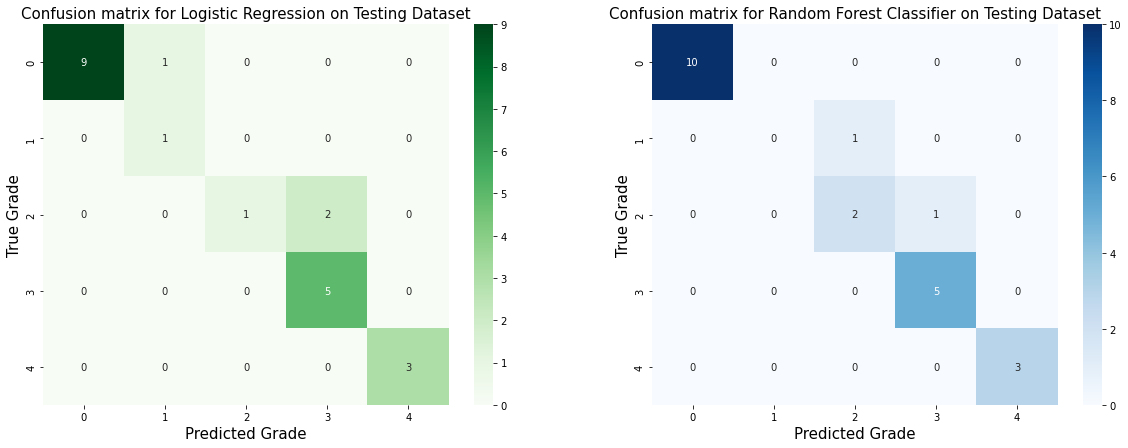

In [25]:
# Plotting the confusion matrix for the Testing Dataset (Logistic Regression)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].set_title('Confusion matrix for Logistic Regression on Testing Dataset', fontsize=15)
sns.heatmap(confusion_matrix(y_test, y_test_pred_log_reg), annot=True, ax=ax[0], cmap='Greens')
ax[0].set_xlabel('Predicted Grade', fontsize=15)
ax[0].set_ylabel('True Grade', fontsize=15);

ax[1].set_title('Confusion matrix for Random Forest Classifier on Testing Dataset', fontsize=15)
sns.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, ax=ax[1], cmap='Blues')
ax[1].set_xlabel('Predicted Grade', fontsize=15)
ax[1].set_ylabel('True Grade', fontsize=15);

## **Step 5 - Important Features**

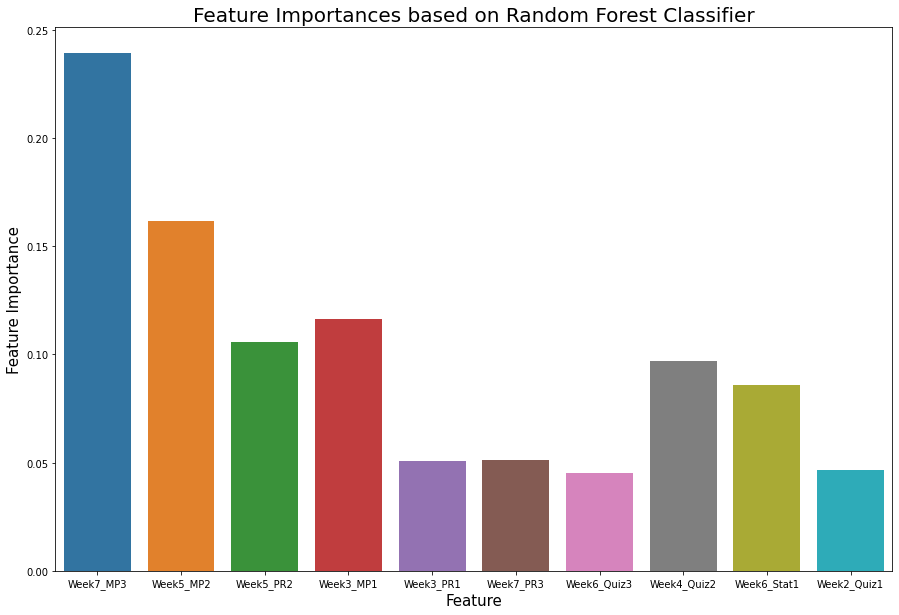

In [26]:
# Plotting feature importances from the Random Forest Classifier

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Feature Importances based on Random Forest Classifier', fontsize=20)
sns.barplot(x=features, y=tree.feature_importances_, ax=ax)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Feature Importance', fontsize=15);